# Started by importing all libraries needed for this analysis

In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import datetime as DT

In [19]:
%matplotlib inline
rcParams ['figure.figsize']=15,8
sb.set_style('whitegrid')
import chardet


# Importing Data and Data Cleaning

This involved reading in the data, checking the data for abnormalities and removing unnecesary data and empty rows

In [73]:
data = pd.read_csv("nypd_mv_collisions")
data.head(5)

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,NaN,Unspecified,Unspecified,NaN,NaN,NaN,59 AVENUE,2016-06-06 23:00:00 UTC,NaN,NaN,...,0,NaN,QUEENS BOULEVARD,3457348,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,UTICA AVENUE,2013-02-04 19:18:00 UTC,40.663556,-73.931609,...,0,NaN,EMPIRE BOULEVARD,153564,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,11213.0
2,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2013-12-06 12:45:00 UTC,40.642669,-74.020004,...,0,NaN,NaN,2965534,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
3,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,JEFFERSON AVENUE,2014-01-25 13:47:00 UTC,40.692785,-73.911806,...,0,NaN,WILSON AVENUE,187439,OTHER,UNKNOWN,NaN,NaN,NaN,11221.0
4,BROOKLYN,Unspecified,NaN,NaN,NaN,NaN,FOSTER AVENUE,2014-09-06 18:30:00 UTC,40.634908,-73.961308,...,0,NaN,EAST 17 STREET,1020144,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,11226.0


In [87]:
data.describe()

,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code
count,882199.000000,882199.000000,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,1.089265e+06,792129.000000
mean,40.721128,-73.924296,2.047068e-02,7.803427e-05,1.861668e-01,4.535168e-04,5.247300e-02,6.646684e-04,2.555733e-01,1.198056e-03,2.200695e+06,10810.882153
std,0.301039,0.988562,1.449423e-01,8.833360e-03,6.263905e-01,2.366021e-02,2.408481e-01,2.602076e-02,6.565478e-01,3.632685e-02,1.519165e+06,565.884302
min,0.000000,-201.359990,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,10000.000000
25%,40.668960,-73.979025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.742420e+05,10128.000000
50%,40.723305,-73.933153,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180753e+06,11205.000000
75%,40.766351,-73.869289,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.453075e+06,11236.000000
max,41.126150,0.000000,4.000000e+00,1.000000e+00,4.300000e+01,5.000000e+00,2.800000e+01,2.000000e+00,4.300000e+01,5.000000e+00,3.726256e+06,11697.000000


In [21]:
data.shape

(1089265, 28)

In [22]:
# This is to parse time.
data = pd.read_csv("nypd_mv_collisions", parse_dates=[1], infer_datetime_format=True) #strip "at column" into date,time and day
temp = pd.DatetimeIndex(data['timestamp'])
data['Date'] = temp.date
data['Time'] = temp.time
data['Day']=temp.day
data['Year']=temp.year

In [23]:
data.columns

Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code', 'Date', 'Time', 'Day', 'Year'],
      dtype='object')

In [24]:
data['Year'].unique()

array([2016, 2013, 2014, 2012, 2017, 2015])

### Data Analysis and Splitting my Data for Further Analysis

In [25]:
data2=data['borough'].value_counts()
data2

BROOKLYN         243354
QUEENS           206046
MANHATTAN        201461
BRONX            104782
STATEN ISLAND     36598
Name: borough, dtype: int64

#### Subsetting the data to get only Brooklyn

In [26]:
brooklyndata = data.loc[data['borough']=='BROOKLYN']
brooklyndata.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,Date,Time,Day,Year
1,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,UTICA AVENUE,2013-02-04 19:18:00 UTC,40.663556,-73.931609,...,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,11213.0,2013-02-04,19:18:00,4,2013
3,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,JEFFERSON AVENUE,2014-01-25 13:47:00 UTC,40.692785,-73.911806,...,OTHER,UNKNOWN,NaN,NaN,NaN,11221.0,2014-01-25,13:47:00,25,2014
4,BROOKLYN,Unspecified,NaN,NaN,NaN,NaN,FOSTER AVENUE,2014-09-06 18:30:00 UTC,40.634908,-73.961308,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,11226.0,2014-09-06,18:30:00,6,2014
7,BROOKLYN,Unspecified,NaN,NaN,NaN,NaN,LORING AVENUE,2012-12-08 16:15:00 UTC,40.668042,-73.860540,...,UNKNOWN,NaN,NaN,NaN,NaN,11208.0,2012-12-08,16:15:00,8,2012
9,BROOKLYN,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,NaN,WEST 5 STREET,2013-12-24 09:20:00 UTC,40.579804,-73.971834,...,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,11224.0,2013-12-24,09:20:00,24,2013


In [27]:
len(brooklyndata)

243354

In [28]:
# counting cells with missing values
sum(brooklyndata.isnull().values.ravel())

1785529

In [29]:
# Counting rows that have missing values somewhere
sum([True for idx,row in brooklyndata.iterrows() if any(row.isnull())])

243354

#### Check data for Null Values

In [30]:
brooklyndata.isnull().sum()

borough                               0
contributing_factor_vehicle_1         0
contributing_factor_vehicle_2     33722
contributing_factor_vehicle_3    227515
contributing_factor_vehicle_4    239550
contributing_factor_vehicle_5    242279
cross_street_name                 22370
timestamp                             0
latitude                           9221
longitude                          9221
location                           9221
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_persons_injured             0
number_of_persons_killed              0
off_street_name                  221011
on_street_name                    22370
unique_key                            0
vehicle_type_code1                 1438
vehicle_type_code2                37819
vehicle_type_code_3              227848


#### Dropping all columns that has missing values greater than 30% in the data

In [31]:
clean_data = brooklyndata.drop(['contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 
                'contributing_factor_vehicle_5', 'off_street_name', 'vehicle_type_code_3', 
                'vehicle_type_code_4', 'vehicle_type_code_5'], axis=1)

#### Check bias in Data and by using histogram or barchart.
#### This will help remove or filter out unnecessary data

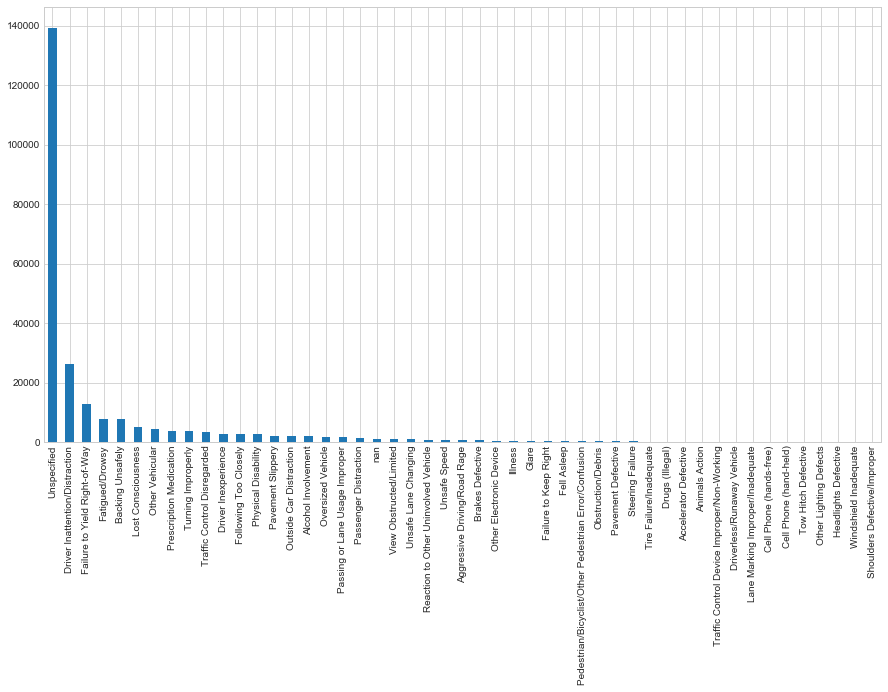

In [32]:
brooklyn_accidents=clean_data['contributing_factor_vehicle_1'].value_counts()
brooklyn_accidents.plot(kind='bar')

In [33]:
# Dropping unspecified because it is too noisy and does not have too much context
drop_Unspecified = clean_data.loc[brooklyndata['contributing_factor_vehicle_1']!='Unspecified']
len(drop_Unspecified)

104150

In [34]:
sum([True for idx,row in drop_Unspecified.iterrows() if any(row.isnull())])

26291

In [35]:
drop_Unspecified.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,...,number_of_persons_killed,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,zip_code,Date,Time,Day,Year
9,BROOKLYN,Driver Inattention/Distraction,Unspecified,WEST 5 STREET,2013-12-24 09:20:00 UTC,40.579804,-73.971834,"(40.5798042, -73.9718339)",0,0,...,0,NEPTUNE AVENUE,115938,PASSENGER VEHICLE,PASSENGER VEHICLE,11224.0,2013-12-24,09:20:00,24,2013
35,BROOKLYN,Driver Inattention/Distraction,Unspecified,AVENUE I,2017-07-03 13:40:00 UTC,40.629055,-73.948330,"(40.629055, -73.94833)",0,0,...,0,EAST 29 STREET,3705283,PASSENGER VEHICLE,PASSENGER VEHICLE,11210.0,2017-07-03,13:40:00,3,2017
39,BROOKLYN,Oversized Vehicle,Unspecified,FLATBUSH AVENUE,2013-01-22 09:54:00 UTC,40.685197,-73.978276,"(40.6851972, -73.9782759)",0,0,...,0,STATE STREET,188977,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),11217.0,2013-01-22,09:54:00,22,2013
47,BROOKLYN,Driver Inexperience,Unspecified,NORTH 5 STREET,2013-02-03 17:20:00 UTC,40.715145,-73.956370,"(40.7151446, -73.95637)",0,0,...,0,ROEBLING STREET,199165,OTHER,SPORT UTILITY / STATION WAGON,11211.0,2013-02-03,17:20:00,3,2013
52,BROOKLYN,Driver Inexperience,Unspecified,16 AVENUE,2012-08-13 16:52:00 UTC,40.616917,-74.000198,"(40.6169173, -74.0001981)",0,0,...,0,74 STREET,121722,PASSENGER VEHICLE,PASSENGER VEHICLE,11204.0,2012-08-13,16:52:00,13,2012


#### one of the techniques of dimensionality reduction is dropping rows with NaN values.
#### Since the number of rows with NaN in this data set is less than 30%, we would drop them.

In [36]:
Final_data = drop_Unspecified.dropna()
len(Final_data)

77859

# Contributing factors of all accidents.

Text(0,0.5,'Contributing Factors')

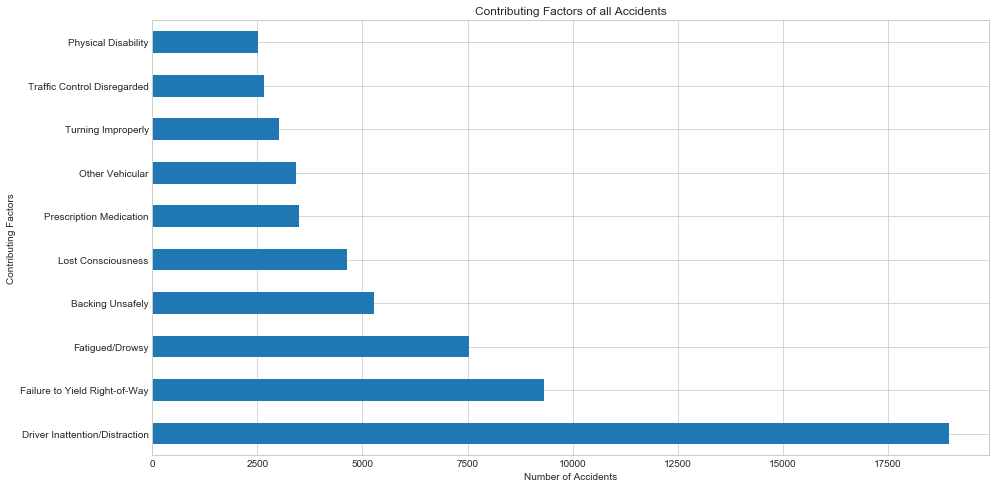

In [37]:
plot_acc_factors =Final_data['contributing_factor_vehicle_1'].value_counts().nlargest(10).plot(kind= 'barh')
plot_acc_factors
plt.title('Contributing Factors of all Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factors')


# No of person injured based on contributing factors

In [38]:

Final_data.groupby('contributing_factor_vehicle_1')['number_of_persons_killed'].sum()

contributing_factor_vehicle_1
Accelerator Defective                                     0
Aggressive Driving/Road Rage                              0
Alcohol Involvement                                       5
Animals Action                                            0
Backing Unsafely                                          0
Brakes Defective                                          0
Cell Phone (hand-held)                                    0
Cell Phone (hands-free)                                   0
Driver Inattention/Distraction                           12
Driver Inexperience                                       0
Driverless/Runaway Vehicle                                0
Drugs (Illegal)                                           0
Failure to Keep Right                                     0
Failure to Yield Right-of-Way                             7
Fatigued/Drowsy                                           0
Fell Asleep                                               0
Following 

In [39]:
Persons_died=Final_data[['number_of_cyclist_killed','number_of_motorist_killed',
        'number_of_pedestrians_killed']]
Persons_died.sum()

number_of_cyclist_killed        10
number_of_motorist_killed       44
number_of_pedestrians_killed    17
dtype: int64

In [40]:
injury = Final_data[['number_of_cyclist_injured','number_of_motorist_injured',
                        'number_of_pedestrians_injured']]
injury.sum()

number_of_cyclist_injured         3001
number_of_motorist_injured       18752
number_of_pedestrians_injured      293
dtype: int64

In [41]:
Total_Persons_died = Final_data[['number_of_persons_killed']].sum()
Total_injury = Final_data[['number_of_persons_injured']].sum()
Total_Persons_died

number_of_persons_killed    71
dtype: int64

In [42]:
Total_injury

number_of_persons_injured    21909
dtype: int64

In [43]:
Final_data['contributing_factor_vehicle_1'].value_counts()

Driver Inattention/Distraction                           18957
Failure to Yield Right-of-Way                             9315
Fatigued/Drowsy                                           7534
Backing Unsafely                                          5276
Lost Consciousness                                        4640
Prescription Medication                                   3495
Other Vehicular                                           3427
Turning Improperly                                        3016
Traffic Control Disregarded                               2656
Physical Disability                                       2508
Driver Inexperience                                       2104
Pavement Slippery                                         1640
Outside Car Distraction                                   1615
Following Too Closely                                     1544
Alcohol Involvement                                       1448
Oversized Vehicle                                      

# Top street with accidents

In [44]:

street_with_highest_accident = Final_data['on_street_name'].value_counts()
top_ten_streets = street_with_highest_accident.nlargest()
top_ten_streets.index

Index(['ATLANTIC AVENUE', 'FLATBUSH AVENUE', 'BEDFORD AVENUE', 'OCEAN PARKWAY',
       'NOSTRAND AVENUE'],
      dtype='object')

Text(0,0.5,'Total Accidents')

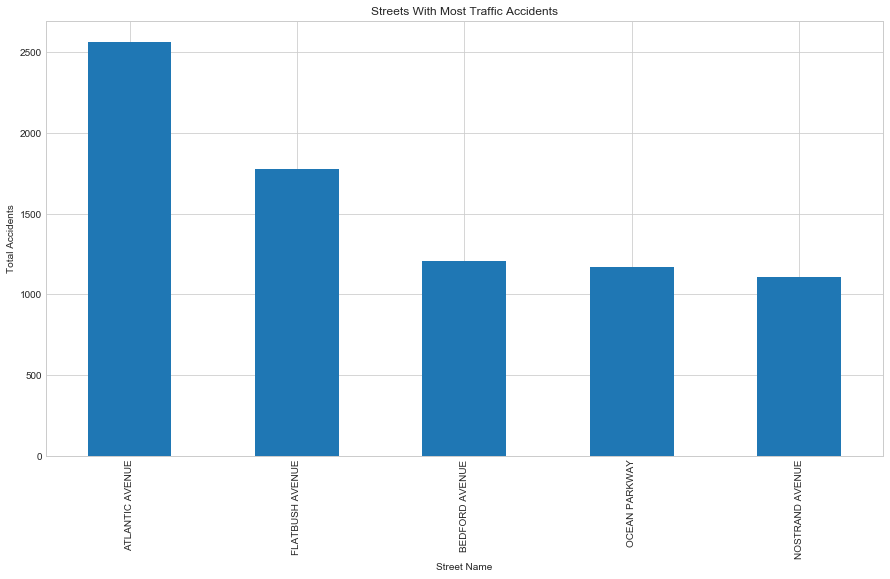

In [45]:
top_ten_streets.plot(kind='bar')
plt.title('Streets With Most Traffic Accidents')
plt.xlabel('Street Name')
plt.ylabel('Total Accidents')


In [46]:
Injury_and_death=Final_data[['number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed']]

In [47]:
Injury_and_death.sum()

number_of_cyclist_injured         3001
number_of_cyclist_killed            10
number_of_motorist_injured       18752
number_of_motorist_killed           44
number_of_pedestrians_injured      293
number_of_pedestrians_killed        17
dtype: int64

# Total_Persons_died
# Total_injury by street

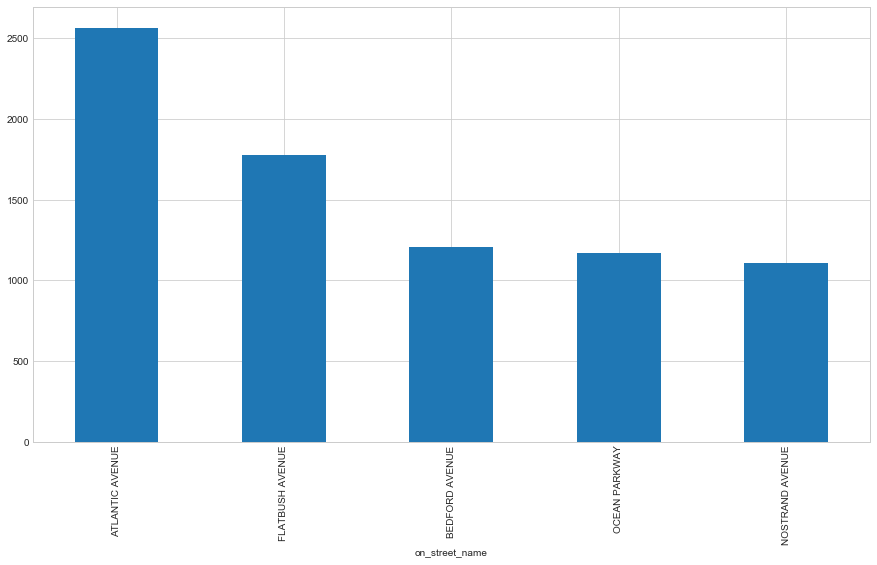

In [48]:
accident_by_on_street=Final_data[['number_of_persons_injured', 'number_of_persons_killed','on_street_name']]
accident_count=accident_by_on_street.groupby('on_street_name')['on_street_name'].count()
accident_count.nlargest().plot(kind='bar')


In [49]:
top_ten_street_reloaded = Final_data.loc[Final_data['on_street_name'].isin(top_ten_streets.index)]
top_ten_street_reloaded.groupby('on_street_name')['contributing_factor_vehicle_1'].value_counts()

on_street_name   contributing_factor_vehicle_1                        
ATLANTIC AVENUE  Driver Inattention/Distraction                           547
                 Fatigued/Drowsy                                          394
                 Turning Improperly                                       280
                 Lost Consciousness                                       214
                 Failure to Yield Right-of-Way                            166
                 Other Vehicular                                          117
                 Prescription Medication                                  114
                 Outside Car Distraction                                   78
                 Backing Unsafely                                          75
                 Traffic Control Disregarded                               73
                 Following Too Closely                                     60
                 Driver Inexperience                                   

In [50]:
# Vehicle which Caused the accident
vehicle_cause_of_accident=Final_data.groupby('vehicle_type_code1')['number_of_persons_injured'].sum()
vehicle_cause_of_accident

vehicle_type_code1
AMBULANCE                            42
BICYCLE                             256
BUS                                 285
FIRE TRUCK                            8
LARGE COM VEH(6 OR MORE TIRES)      166
LIVERY VEHICLE                      191
MOTORCYCLE                          267
OTHER                               371
PASSENGER VEHICLE                 13036
PICK-UP TRUCK                       213
SCOOTER                               4
SMALL COM VEH(4 TIRES)              154
SPORT UTILITY / STATION WAGON      5700
TAXI                                434
UNKNOWN                             288
VAN                                 494
Name: number_of_persons_injured, dtype: int64

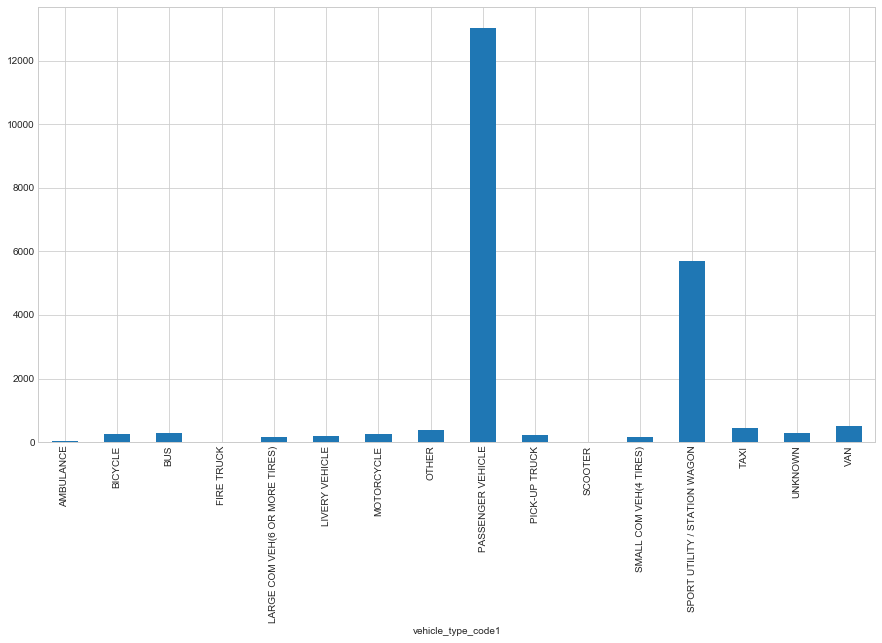

In [51]:
vehicle_cause_of_accident.plot(kind = 'bar')

In [52]:
accident_cause = Final_data.loc[Final_data['vehicle_type_code1']!='PASSENGER VEHICLE']
accident_cause2=accident_cause['vehicle_type_code1'].value_counts()
accident_cause2

SPORT UTILITY / STATION WAGON     20536
VAN                                2358
OTHER                              1913
LARGE COM VEH(6 OR MORE TIRES)     1342
TAXI                               1300
SMALL COM VEH(4 TIRES)             1281
PICK-UP TRUCK                      1229
BUS                                1191
UNKNOWN                            1048
LIVERY VEHICLE                      513
MOTORCYCLE                          454
BICYCLE                             331
AMBULANCE                           168
FIRE TRUCK                           72
SCOOTER                              17
Name: vehicle_type_code1, dtype: int64

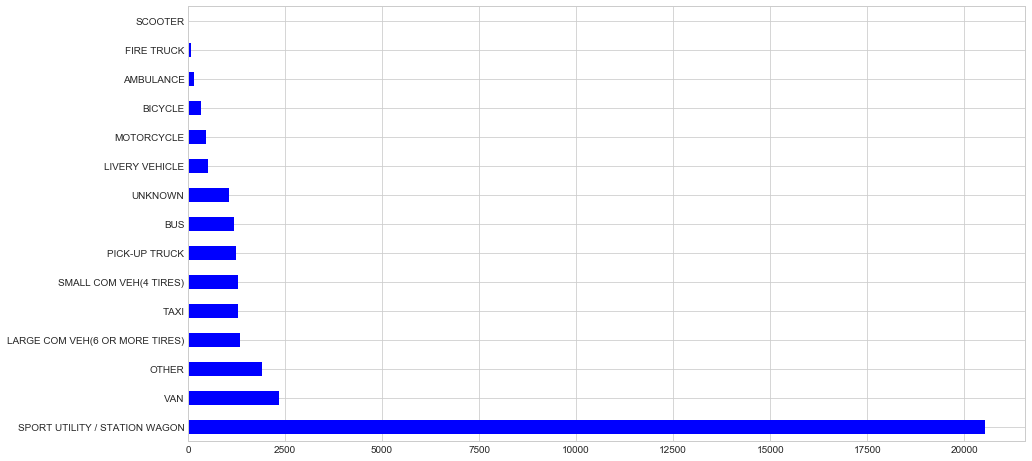

In [53]:
accident_cause2.plot(kind='barh', color = 'blue')

# Time of Accidents. Times when Accident is likely to Occur

In [54]:
time_occurence=Final_data['Time'].value_counts()
top_ten_time_occurence=time_occurence.nlargest()
top_ten_time_occurence

16:00:00    1103
15:00:00    1083
17:00:00     980
18:00:00     941
14:00:00     937
Name: Time, dtype: int64

Text(0,0.5,'Total Accidents')

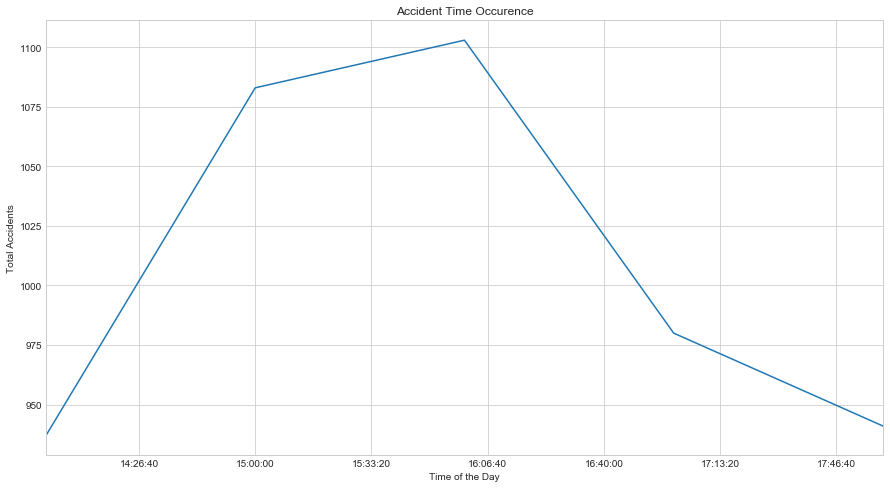

In [72]:
top_ten_time_occurence.plot(kind='line')
plt.title('Accident Time Occurence')
plt.xlabel('Time of the Day')
plt.ylabel('Total Accidents')

In [56]:
day_occurence=Final_data['Day'].value_counts()
day_occurence.nlargest(10)

1     2708
3     2686
20    2671
19    2671
5     2664
18    2655
7     2640
9     2626
6     2610
14    2606
Name: Day, dtype: int64

In [57]:
death_alone_factor=Final_data[['number_of_cyclist_killed','number_of_motorist_killed',
                        'number_of_pedestrians_killed', 'contributing_factor_vehicle_1']]

groupdeath=death_alone_factor.groupby('contributing_factor_vehicle_1')['contributing_factor_vehicle_1'].value_counts()
groupdeath=groupdeath.nlargest(5)

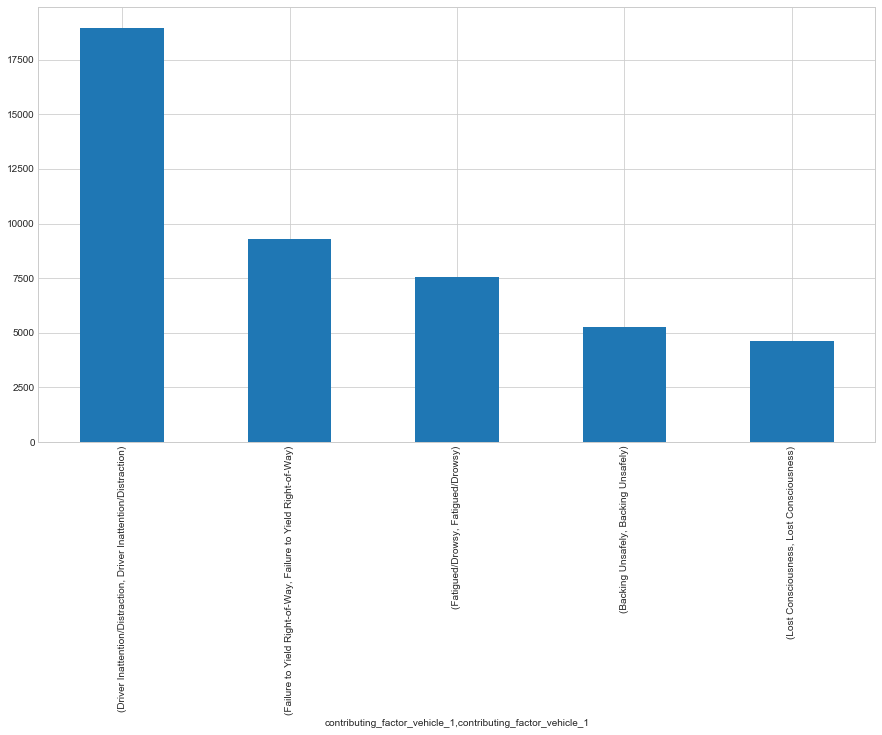

In [58]:
# Intersections with most death
groupdeath.plot(kind='bar')

In [59]:
# contributing factors for injury
injury_contributing_factors=Final_data.groupby('contributing_factor_vehicle_1')['number_of_persons_injured'].sum()
top_contributing_factors_injury=injury_contributing_factors.nlargest(10)
top_contributing_factors_injury

contributing_factor_vehicle_1
Driver Inattention/Distraction    4994
Failure to Yield Right-of-Way     3459
Fatigued/Drowsy                   2033
Physical Disability               1682
Traffic Control Disregarded       1555
Other Vehicular                    829
Prescription Medication            755
Alcohol Involvement                654
Lost Consciousness                 586
Driver Inexperience                530
Name: number_of_persons_injured, dtype: int64

In [60]:
# contributing factors for death
killed_persons = Final_data[['number_of_persons_killed','contributing_factor_vehicle_1']]
contributing_factors_killed = killed_persons['contributing_factor_vehicle_1'].value_counts()
top_contributing_factors_killed = contributing_factors_killed.nlargest(10)
top_contributing_factors_killed

Driver Inattention/Distraction    18957
Failure to Yield Right-of-Way      9315
Fatigued/Drowsy                    7534
Backing Unsafely                   5276
Lost Consciousness                 4640
Prescription Medication            3495
Other Vehicular                    3427
Turning Improperly                 3016
Traffic Control Disregarded        2656
Physical Disability                2508
Name: contributing_factor_vehicle_1, dtype: int64

In [61]:
Final_data.columns

Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'cross_street_name', 'timestamp',
       'latitude', 'longitude', 'location', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_persons_injured',
       'number_of_persons_killed', 'on_street_name', 'unique_key',
       'vehicle_type_code1', 'vehicle_type_code2', 'zip_code', 'Date', 'Time',
       'Day', 'Year'],
      dtype='object')

Text(0,0.5,'Intersection Names')

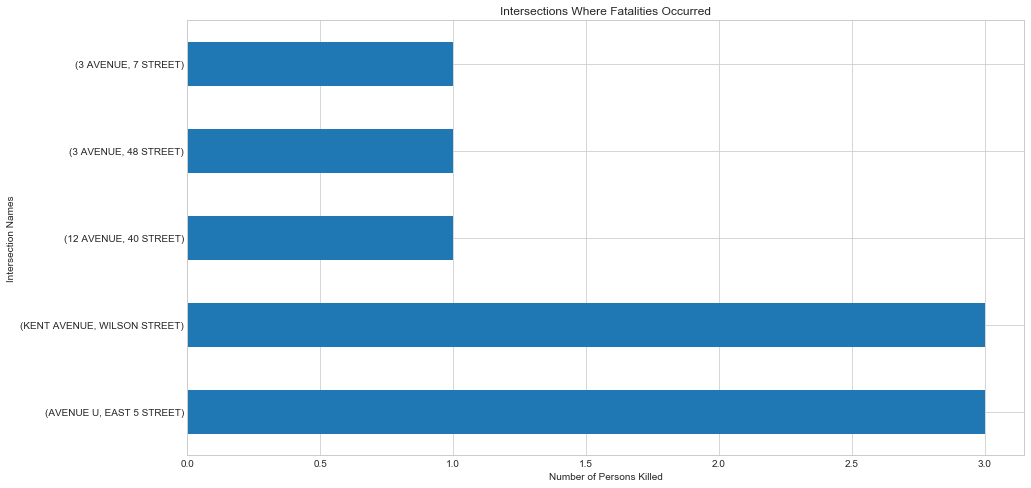

In [62]:
# intersections with most people killed
Intersections = Final_data[['number_of_persons_killed','cross_street_name', 'on_street_name']]
top_intersection = Intersections.groupby(['on_street_name','cross_street_name'])['number_of_persons_killed'].sum()
top_intersection.nlargest().plot(kind='barh')
plt.title('Intersections Where Fatalities Occurred')
plt.xlabel('Number of Persons Killed')
plt.ylabel('Intersection Names')

Text(0,0.5,'Intersection Name')

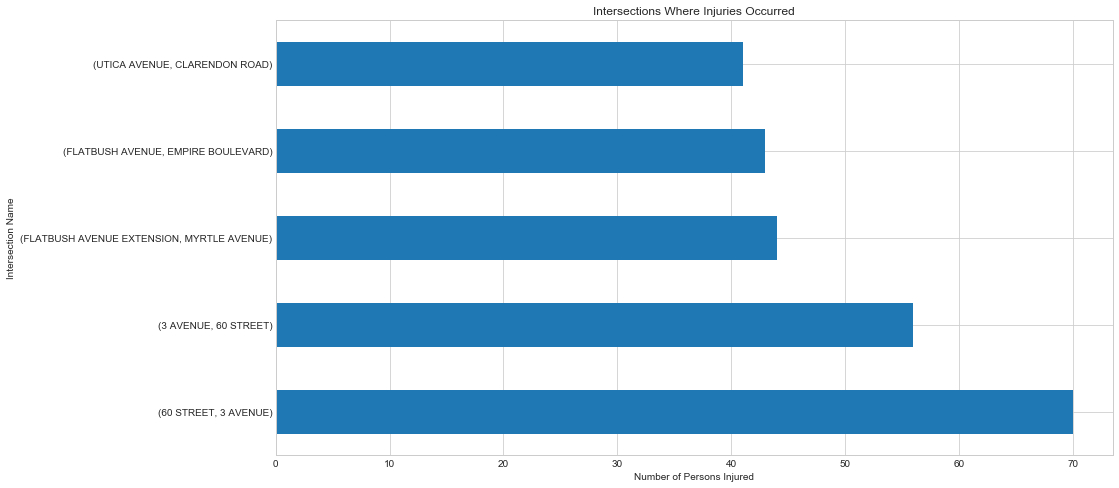

In [63]:
# intersections with most people injured
Intersections_injured = Final_data[['on_street_name', 'number_of_persons_injured','cross_street_name']]
top_Intersections_injured = Intersections_injured.groupby(['on_street_name','cross_street_name'])['number_of_persons_injured'].sum()
#top_Intersections_injured.nlargest()
top_Intersections_injured.nlargest().plot(kind = 'barh')
plt.title('Intersections Where Injuries Occurred')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Intersection Name')

In [64]:
# Vehicle involved in accident that led to death
vehicle= accident_cause[['number_of_persons_killed','vehicle_type_code1']]
vehicle.groupby('vehicle_type_code1')['number_of_persons_killed'].sum().nlargest(5)

vehicle_type_code1
SPORT UTILITY / STATION WAGON    15
MOTORCYCLE                        6
UNKNOWN                           3
BUS                               2
OTHER                             2
Name: number_of_persons_killed, dtype: int64

In [65]:
# Vehicle involved in accident that led to injuries
vehicle_injury= accident_cause[['number_of_persons_injured','vehicle_type_code1']]
vehicle_injury.groupby('vehicle_type_code1')['number_of_persons_injured'].sum().nlargest(5)

vehicle_type_code1
SPORT UTILITY / STATION WAGON    5700
VAN                               494
TAXI                              434
OTHER                             371
UNKNOWN                           288
Name: number_of_persons_injured, dtype: int64

# Data Preprocessing for Predictive Analytics

In [66]:
# Data cleaning for predictions
len(Final_data.loc[Final_data['number_of_persons_injured']==0])

63265

In [67]:
len(Final_data.loc[Final_data['number_of_persons_injured']>0])

14594

In [68]:
Prediction_data = Final_data.drop(['borough', 'timestamp', 'latitude', 'longitude', 
       'location', 'number_of_cyclist_injured',
        'unique_key','zip_code', 'Date', 'Time', 'Year'], axis =1)
Prediction_data.head()

,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,on_street_name,vehicle_type_code1,vehicle_type_code2,Day
9,Driver Inattention/Distraction,Unspecified,WEST 5 STREET,0,0,0,0,0,0,0,NEPTUNE AVENUE,PASSENGER VEHICLE,PASSENGER VEHICLE,24
35,Driver Inattention/Distraction,Unspecified,AVENUE I,0,0,0,0,0,0,0,EAST 29 STREET,PASSENGER VEHICLE,PASSENGER VEHICLE,3
39,Oversized Vehicle,Unspecified,FLATBUSH AVENUE,0,0,0,0,0,0,0,STATE STREET,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),22
47,Driver Inexperience,Unspecified,NORTH 5 STREET,0,0,0,0,0,0,0,ROEBLING STREET,OTHER,SPORT UTILITY / STATION WAGON,3
52,Driver Inexperience,Unspecified,16 AVENUE,0,0,0,0,0,0,0,74 STREET,PASSENGER VEHICLE,PASSENGER VEHICLE,13


In [75]:
#Prediction_data
# Predict if an accident would be dangerous based on street and car.
Prediction_data['Dangerous_Accident'] = np.where(Prediction_data['number_of_persons_injured']==0, 'No', 'Yes')
Prediction_data

,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,on_street_name,vehicle_type_code1,vehicle_type_code2,Day,Dangerous_Accident
9,Driver Inattention/Distraction,Unspecified,WEST 5 STREET,0,0,0,0,0,0,0,NEPTUNE AVENUE,PASSENGER VEHICLE,PASSENGER VEHICLE,24,No
35,Driver Inattention/Distraction,Unspecified,AVENUE I,0,0,0,0,0,0,0,EAST 29 STREET,PASSENGER VEHICLE,PASSENGER VEHICLE,3,No
39,Oversized Vehicle,Unspecified,FLATBUSH AVENUE,0,0,0,0,0,0,0,STATE STREET,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),22,No
47,Driver Inexperience,Unspecified,NORTH 5 STREET,0,0,0,0,0,0,0,ROEBLING STREET,OTHER,SPORT UTILITY / STATION WAGON,3,No
52,Driver Inexperience,Unspecified,16 AVENUE,0,0,0,0,0,0,0,74 STREET,PASSENGER VEHICLE,PASSENGER VEHICLE,13,No
66,Following Too Closely,Unspecified,GERRITSEN AVENUE,0,0,0,0,0,0,0,WHITNEY AVENUE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,7,No
83,Prescription Medication,Unspecified,4 AVENUE,0,0,0,0,0,0,0,ATLANTIC AVENUE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,5,No
84,Fatigued/Drowsy,Unspecified,PARADE PLACE,0,0,0,0,0,0,0,PARKSIDE AVENUE,PASSENGER VEHICLE,PASSENGER VEHICLE,14,No
86,Failure to Yield Right-of-Way,Unspecified,61 STREET,0,0,0,0,0,0,0,BAY PARKWAY,PASSENGER VEHICLE,PASSENGER VEHICLE,25,No
147,Driver Inattention/Distraction,Driver Inattention/Distraction,HEGEMAN AVENUE,0,0,0,0,0,0,0,LINDEN BOULEVARD,PASSENGER VEHICLE,PASSENGER VEHICLE,3,No


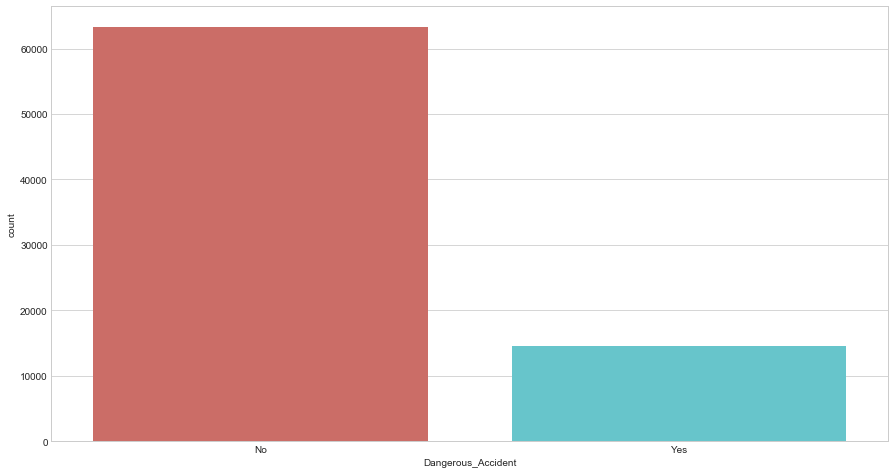

In [76]:
# Checking that my target variable is binary
sb.countplot(x='Dangerous_Accident',data=Prediction_data, palette='hls')

# Predictive Analytics (Logistic Regression)

In [77]:
import sklearn

from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

/Users/rilphumie/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
Prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77859 entries, 9 to 1089264
Data columns (total 15 columns):
contributing_factor_vehicle_1    77859 non-null object
contributing_factor_vehicle_2    77859 non-null object
cross_street_name                77859 non-null object
number_of_cyclist_killed         77859 non-null int64
number_of_motorist_injured       77859 non-null int64
number_of_motorist_killed        77859 non-null int64
number_of_pedestrians_injured    77859 non-null int64
number_of_pedestrians_killed     77859 non-null int64
number_of_persons_injured        77859 non-null int64
number_of_persons_killed         77859 non-null int64
on_street_name                   77859 non-null object
vehicle_type_code1               77859 non-null object
vehicle_type_code2               77859 non-null object
Day                              77859 non-null int64
Dangerous_Accident               77859 non-null object
dtypes: int64(8), object(7)
memory usage: 12.0+ MB


In [79]:
#Prediction_data['Day'] = pd.Categorical(Prediction_data.Day)
Prediction_data = Prediction_data.drop(['cross_street_name', 'on_street_name',
                  'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2','number_of_persons_killed',
                    'vehicle_type_code1', 'vehicle_type_code2','number_of_persons_injured'],axis=1)

In [80]:
X = Prediction_data.ix[:,(0,1,2,3,4,5)].values
y = Prediction_data.ix[:,6].values

/Users/rilphumie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [81]:
# Splitting data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [82]:
# Logistic regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# Predictions
y_pred = LogReg.predict(X_test)

# Confusion Matrix and Accuracy of Algorithm

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[18968,     0],
       [  896,  3494]])

In [85]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.95      1.00      0.98     18968
        Yes       1.00      0.80      0.89      4390

avg / total       0.96      0.96      0.96     23358



In [86]:
import statsmodels.api as sm   
big = LogReg.fit(X_train, y_train).fit


/Users/rilphumie/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
